# **2. An Overview of R.**

## **2.1 The Uses of R**

**2.1.1 R may be used as a calculator.**

In R, when you type an expression at the command line in the console window and press Enter, R evaluates it and prints out the result. You'll see a prompt (>) on the screen where you can type your expression. After typing the expression and pressing Enter, any result generated by the expression will be displayed on the subsequent lines.
In Jupyter Notebook, code cells are executed sequentially. When you run a code cell containing an expression, the notebook sends the expression to the interpreter, which evaluates it and displays the result directly below the cell.

In [118]:
2 + 6

[1] 8

In [119]:
sqrt(365)

[1] 19.10497

In [120]:
2*3*4*36

[1] 864

In [121]:
1000*(1+0.075)^5 - 1000 # Interest on $1000, compounded annually
# at 7.5% p.a. for five years

[1] 435.6293

In [122]:
pi #R knows about pi

[1] 3.141593

In [123]:
 2*pi*6378 #Circumference of Earth at Equator, in km; radius is 6378 km

[1] 40074.16

In [124]:
 sin(c(30,60,90)*pi/180) # Convert angles to radians, then take sin()

[1] 0.5000000 0.8660254 1.0000000

**2.1.2 R will provide numerical or graphical summaries of data**


A data frame in R stores rectangular arrays where columns can be vectors of numbers, factors, or text strings. They are fundamental to modern R data processing. Think of data frames as matrices where rows are observations and columns are variables. For instance, the data frame "hills" has three columns: distance, climb, and time. You can use the `summary()` function to get an overview of these variables.

In [126]:
load("/content/hills.RData")  #Assumes hills.Rdata is in the working directory

In [127]:
summary(hills)

    distance          climb           time       
 Min.   : 2.000   Min.   : 300   Min.   : 15.95  
 1st Qu.: 4.500   1st Qu.: 725   1st Qu.: 28.00  
 Median : 6.000   Median :1000   Median : 39.75  
 Mean   : 7.529   Mean   :1815   Mean   : 57.88  
 3rd Qu.: 8.000   3rd Qu.:2200   3rd Qu.: 68.62  
 Max.   :28.000   Max.   :7500   Max.   :204.62  

In upcoming sections, we'll cover graphical summaries, such as variable ranges. For instance, distances range from 2 to 28 miles, while times range from 15.95 to 204.6 minutes.

**2.1.3 R has extensive graphical abilities**


The primary R graphics function is plot(), used for creating basic plots. Additional functions allow adding points, lines, text, tick marks, and labels to plots. Other graphical summaries include the scatterplot matrix, which is useful for visualizing relationships between variables. To generate a scatterplot matrix for the hills data frame, use:

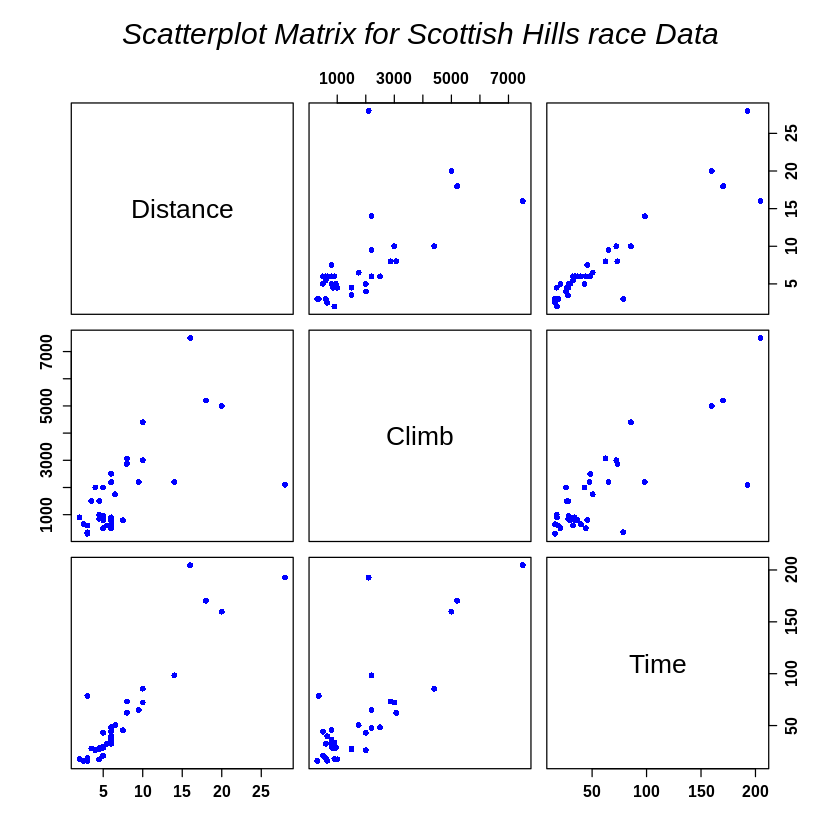

In [128]:
# Customizing pairs plot for the hills data frame
pairs(hills,
      col = "blue",                        # Set point color
      pch = 16,                            # Set point shape
      labels = c("Distance", "Climb", "Time"),  # Set axis labels
      main = "Scatterplot Matrix for Scottish Hills race Data",  # Set main title
      font.main = 3,                       # Set main title font style
      cex.main = 1.5,                      # Set main title font size
      font.axis = 2,                       # Set axis labels font style
      cex.axis = 1.2,                      # Set axis labels font size
      font.lab = 2,                        # Set axis title font style
      cex.lab = 1.2)                       # Set axis title font size

**2.1.4 R will handle a variety of specific analyses**

The examples that will be given are correlation and regression.

**Correlation:**

We calculate the correlation matrix for the hills data:

In [129]:
options(digits=3)

In [130]:
t(cor(hills))  # t() function is used to transpose table

,distance,climb,time
distance,1.000,0.652,0.920
climb,0.652,1.000,0.805
time,0.920,0.805,1.000


In [131]:
# Suppose we wish to calculate logarithms, and then calculate correlations. We can do all this in one step, thus:
t(cor(log(hills)))

,distance,climb,time
distance,1.00,0.700,0.890
climb,0.70,1.000,0.724
time,0.89,0.724,1.000


Unfortunately, R did not relabel the variables as log-transformed when transposing the correlation matrix. The correlations between time and distance, and time and climb, have reduced.

**For straight-line regression**, the
```
lm()
```
function is used to compute the regression of distance on stretch in the `elasticband` dataset.

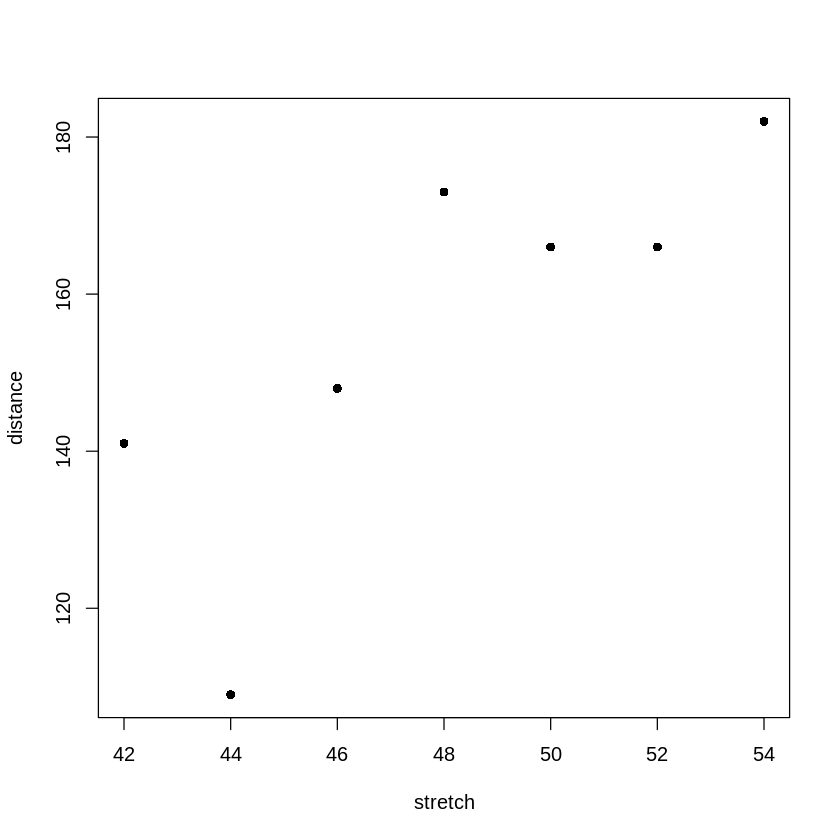

In [132]:
elasticband <- data.frame(stretch=c(46,54,48,50,44,42,52),
 distance=c(148,182,173,166,109,141,166))
plot(distance ~ stretch, data = elasticband, pch = 16)

In [135]:
elastic.lm<- lm(distance ~ stretch, data = elasticband)
lm(distance ~ stretch, data = elasticband)


Call:
lm(formula = distance ~ stretch, data = elasticband)

Coefficients:
(Intercept)      stretch  
     -63.57         4.55  


In [136]:
# for More complete information
summary(elastic.lm)


Call:
lm(formula = distance ~ stretch, data = elasticband)

Residuals:
      1       2       3       4       5       6       7 
  2.107  -0.321  18.000   1.893 -27.786  13.321  -7.214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -63.57      74.33   -0.86    0.431  
stretch         4.55       1.54    2.95    0.032 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.3 on 5 degrees of freedom
Multiple R-squared:  0.635,	Adjusted R-squared:  0.562 
F-statistic: 8.71 on 1 and 5 DF,  p-value: 0.0319


**2.1.5 R is an Interactive Programming Language**

We calculate the Fahrenheit temperatures that correspond to Celsius temperatures 25, 26, …, 30:

In [137]:
celsius <- 25:30
fahrenheit <- 9/5*celsius + 32
conversion <- data.frame(celsius, Fahrenheit = fahrenheit)
print(conversion)

  celsius Fahrenheit
1      25       77.0
2      26       78.8
3      27       80.6
4      28       82.4
5      29       84.2
6      30       86.0


## **2.2 R Objects**

In R, everything is treated as an object, including functions and data structures. You can list all objects in your workspace using `ls()` or `objects()`, specifying patterns if needed. Typing the name of an object prints its contents. It's advisable to save your workspace periodically, and you can also save individual objects or groups of objects into named image files.

In [138]:
save.image()    # Save contents of workspace, into the file .Rdata
save.image(file="archive.Rdata")         #Save into the file archive.Rdata


In [139]:
save(celsius, fahrenheit, file="tempscales.Rdata")

Image files, from the working directory or (with the path specified) from another directory, can be attached, thus
making objects in the file available on request. For example

In [140]:
attach("tempscales.Rdata")
ls(pos=2)        #check the contents of the file that has been attached & parameter pos gives the position on the search list

The following objects are masked _by_ .GlobalEnv:

    celsius, fahrenheit




[1] "celsius"    "fahrenheit"

**Important:**

In R, when you exit the session, you're prompted to save the workspace image, typically in a file named `.RData` in your current working directory. This saves all objects created during the session for future use. However, it's important to clean up unnecessary objects using `rm()` before quitting to avoid clutter. This ensures that only relevant objects are saved in the workspace image. When you start another session in the same directory, the workspace image is automatically loaded, giving you access to your previous objects.

## 2.3 **Looping**



In [141]:
for(i in 1:10)print(i)     # A simple example of a for loop

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [142]:
# Celsius to Fahrenheit
for(celsius in 25:30)print(c(celsius, 9/5*celsius + 32))  #Another example ,to do in a complicated way what we did very simply in section 2.1.5:

[1] 25 77
[1] 26.0 78.8
[1] 27.0 80.6
[1] 28.0 82.4
[1] 29.0 84.2
[1] 30 86


**2.3.1 More on looping**


Here is a long-winded way to sum the three numbers 31, 51 and 91:

In [143]:
answer <- 0
for(j in c(31,51,91)){answer<- j+ answer}
answer

[1] 173

The calculation adds up values iteratively to build the object called "answer". It uses a sequence of values for "j" stored in the vector (31, 51, 91). Initially, when j = 31, the answer is set to 31. Then, when j = 51, the answer becomes 31 + 51 = 82. Finally, when j = 91, the answer is updated to 82 + 91 = 173.

In [144]:
sum(c(31,51,91))    #straightforward way to do this calculation

[1] 173

Let's see a problem on looping :

**Problem:**

You are given an array of integers. Your task is to write a program that finds and prints the maximum element in the array.

Input:
The input consists of a single line containing space-separated integers, representing the elements of the array.

Output:
Output a single integer, which is the maximum element in the given array.

Constraints:
- The length of the array (n) is at most 10^5.
- Each element in the array is an integer in the range [-10^9, 10^9].

Example:
Input:
10 5 20 15 8

Output:
20

Explanation:
In the given array [10, 5, 20, 15, 8], the maximum element is 20. Hence, the output is 20.

In [145]:
# Given array
arr <- c(10, 5, 20, 15, 8)

# Initialize the maximum element
max_element <- arr[1]

# Loop through each element of the array
for (i in 2:length(arr)) {
    # Check if the current element is greater than the maximum element
    if (arr[i] > max_element) {
        # Update the maximum element if the current element is greater
        max_element <- arr[i]
    }
}

# Print the maximum element
cat("The maximum element in the array is:", max_element)


The maximum element in the array is: 20

This code iterates through each element of the array and updates the max_element variable if it finds an element greater than the current maximum element. Finally, it prints the maximum element found in the array.

## **2.4 Vectors**

Examples of vectors are:

```
c(2,3,5,2,7,1)
3:10 # The numbers 3, 4, .., 10
c(TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE)
c(”Canberra”,”Sydney”,”Newcastle”,”Darwin”)
```

Vectors may have mode logical, numeric or character. The first two vectors above are numeric, the third is
logical (i.e. a vector with elements of mode logical), and the fourth is a string vector (i.e. a vector with elements
of mode character).

The missing value symbol, which is NA, can be included as an element of a vector

**2.4.1 Joining (concatenating) vectors**

The c in c(2, 3, 5, 7, 1) above is an acronym for “concatenate”, i.e. the meaning is: “Join these numbers
together in to a vector. Existing vectors may be included among the elements that are to be concatenated. In the
following we form vectors x and y, which we then concatenate to form a vector z:

In [146]:
x <- c(2,3,5,7)
x

[1] 2 3 5 7

In [147]:
y <- c(10,15,12)
y

[1] 10 15 12

In [148]:
z <- c(x,y)    #concatenate function c() may also be used to join lists.
z

[1]  2  3  5  7 10 15 12

**2.4.2 Subsets of Vectors**

There are two common ways to extract subsets of vectors.

1.Specify the numbers of the elements that are to be extracted, e.g.

In [149]:
x <- c(3,11,8,15,12)  # Assign to x the values 3, 11, 8, 15, 12
x[c(2,4)]   # extract element (rows) 2 and 4

[1] 11 15

In [150]:
x <- c(3,11,8,15,12)
x[-c(2,3)]    # One can use negative number to omit elements:

[1]  3 15 12

2. Specify a vector of logical values. The elements that are extracted are those for which the logical value is T.
Thus suppose we want to extract values of x that are greater than 10

In [151]:
x>10  # This generates a vector of logical (T or F)

[1] FALSE  TRUE FALSE  TRUE  TRUE

In [152]:
x[x>10]

[1] 11 15 12

Arithmetic relations that may be used in the extraction of subsets of vectors are <, <=, >, >=, ==, and !=. The
first four compare magnitudes, == tests for equality, and != tests for inequality.

**2.4.3 The Use of NA in Vector Subscripts**

Note that any arithmetic operation or relation that involves NA generates an NA. Set

In [153]:
y <- c(1, NA, 3, 0, NA)
y

[1]  1 NA  3  0 NA

Be warned that y[y==NA] <- 0 leaves y unchanged. The reason is that all elements of y==NA evaluate to NA.
This does not select an element of y, and there is no assignment.
To replace all NAs by 0, use

In [154]:
y[is.na(y)] <- 0
y

[1] 1 0 3 0 0

**2.4.4 Factors**

A factor is stored internally as a numeric vector with values 1, 2, 3, k, where k is the number of levels. An
attributes table gives the ‘level’ for each integer value13. Factors provide a compact way to store character
strings. They are crucial in the representation of categorical effects in model and graphics formulae. The class
attribute of a factor has, not surprisingly, the value “factor”.

Consider a survey that has data on 691 females and 692 males. If the first 691 are females and the next 692
males, we can create a vector of strings that that holds the values thus:

In [155]:
gender <- c(rep("female",691), rep("male",692)) # rep function is used to create copies here we are creating 691 and 692 copies of female and male respectivly

In [156]:
gender <- factor(gender)    #changing vetor to factor

In R, the factor "gender" is internally represented as a sequence of 691 occurrences of 1 (representing "female") followed by 692 occurrences of 2 (representing "male"). Additionally, there exists a table mapping these numeric values to their corresponding genders:

- 1 represents "female"
- 2 represents "male"

Storing gender as a factor reduces the required storage space. When context implies the need for a character string, the numeric values are translated into their corresponding genders using the aforementioned table. These genders, "female" and "male," are referred to as the levels of the factor. By default, the levels are ordered in alphanumeric sequence, resulting in "female" preceding "male" in the factor representation.

In [157]:
levels(gender)            # Assumes gender is a factor, created as above

[1] "female" "male"

In [158]:
#The order of the levels in a factor determines the order in which the levels appear in graphs that use this information, and in tables.
gender <- relevel(gender, ref="male")   #To cause “male” to come before “female”
#alternative
gender <- factor(gender,levels=c("male","female"))

This last syntax is available both when the factor is first created, or later when one wishes to change the order of
levels in an existing factor. Incorrect spelling of the level names will generate an error message.

In [159]:
gender <- factor(c(rep("female", 691), rep("male", 692)))
table(gender)

gender <- factor(gender, levels = c("male", "female"))
table(gender)

gender <- factor(gender, levels = c("Male", "female"))
# Erroneous - "male" rows now hold missing values
table(gender)

rm(gender) # Remove gender


gender
female   male 
   691    692 

gender
  male female 
   692    691 

gender
  Male female 
     0    691 

## **2.5 Data Frames**

Data frames are essential for data manipulation and analysis in R. They are an extension of matrices, allowing columns to have different data types. However, each column must contain elements of the same data type, such as numeric, factor, or character.

One of the datasets available in the DAAG package is Cars93.summary, derived from the Cars93 dataset in the MASS package by Venables and Ripley. It provides summarized information from the original dataset.

In [160]:
cars93 <- read.csv("/content/cars93.csv")  #Its normally available in R packages for this notebook , we are using cars93.csv file
cars93



type,price,mpg_city,drive_train,passengers,weight
<chr>,<dbl>,<int>,<chr>,<int>,<int>
small,15.9,25,front,5,2705
midsize,33.9,18,front,5,3560
midsize,37.7,19,front,6,3405
midsize,30.0,22,rear,4,3640
midsize,15.7,22,front,6,2880
large,20.8,19,front,6,3470
large,23.7,16,rear,6,4105
midsize,26.3,19,front,5,3495
large,34.7,16,front,6,3620


In [161]:
# Create the Cars93.summary data frame
Cars93.summary <- data.frame(
  Category = c("Compact", "Large", "Midsize", "Small", "Sporty", "Van"),
  Min.passengers = c(4, 6, 4, 4, 2, 7),
  Max.passengers = c(6, 6, 6, 5, 4, 8),
  No.of.cars = c(16, 11, 22, 21, 14, 9),
  abbrev = c("C", "L", "M", "Sm", "Sp", "V")
)

# Print the Cars93.summary data frame
print(Cars93.summary)

  Category Min.passengers Max.passengers No.of.cars abbrev
1  Compact              4              6         16      C
2    Large              6              6         11      L
3  Midsize              4              6         22      M
4    Small              4              5         21     Sm
5   Sporty              2              4         14     Sp
6      Van              7              8          9      V


The `Cars93.summary` data frame consists of row labels such as Compact, Large, etc. The columns include Min.passengers, Max.passengers, No.of.cars, and abbrev. The first three columns are numeric, while the fourth column is character. Columns can hold vectors of any mode, and the column abbrev could be stored as a factor. Accessing the fourth column can be done with `Cars93.summary[, 4]` or `Cars93.summary$abbrev`, storing it in the vector type.

In [162]:
type <- Cars93.summary$abbrev
type
type <- Cars93.summary[,4]
type
type <- Cars93.summary[,"abbrev"]
type
type <- Cars93.summary[[4]] # Take the object that is stored
# in the fourth list element
type

[1] "C"  "L"  "M"  "Sm" "Sp" "V"

[1] 16 11 22 21 14  9

[1] "C"  "L"  "M"  "Sm" "Sp" "V"

[1] 16 11 22 21 14  9

**2.5.1 Data frames as lists**

A data frame is like a collection of columns, each containing data of the same length. Just like accessing elements in a list, you can extract columns from a data frame. For instance, `Cars93.summary[4]` gives you a data frame with only the fourth column. You can also use `Cars93.summary[[4]]` or `Cars93.summary[,4]` to get the column vector. Using matrix-like indexing, such as `Cars93.summary[,4]` or `Cars93.summary[1, 4]`, leverages the structured layout of data frames.

**2.5.2 Inclusion of character string vectors in data frames**

When you input data using `read.table()` or create data frames with `data.frame()`, character vectors are automatically converted into factors by default. You can prevent this conversion by setting the parameter `stringsAsFactors=TRUE`. This parameter is available in both `read.table()` and `data.frame()`. Another option in `read.table()` is `as.is=TRUE`, which serves the same purpose.

**2.5.3 Built-in data sets**

We will often use data sets that accompany one of the R packages, usually stored as data frames. One such data
frame, in the datasets package, is trees, which gives girth, height and volume for 31 Black Cherry Trees.

In [163]:
summary(trees)

     Girth          Height       Volume    
 Min.   : 8.3   Min.   :63   Min.   :10.2  
 1st Qu.:11.1   1st Qu.:72   1st Qu.:19.4  
 Median :12.9   Median :76   Median :24.2  
 Mean   :13.2   Mean   :76   Mean   :30.2  
 3rd Qu.:15.2   3rd Qu.:80   3rd Qu.:37.3  
 Max.   :20.6   Max.   :87   Max.   :77.0  

In [164]:
data()    #to get a list of built-in data sets in the packages that have been attached

## **2.6 Common Useful Functions**

In [ ]:
print() # Prints a single R object
cat() # Prints multiple objects, one after the other
length() # Number of elements in a vector or of a list
mean()
median()
range()
unique() # Gives the vector of distinct values
diff() # Replace a vector by the vector of first differences
 # N. B. diff(x) has one less element than x
sort() # Sort elements into order, but omitting NAs
order() # x[order(x)] orders elements of x, with NAs last
cumsum()
cumprod()
rev() # reverse the order of vector elements

The functions mean(), median(), range(), and a number of other functions, take the argument na.rm=T;
i.e. remove NAs, then proceed with the calculation.
By default, sort() omits any NAs. The function order() places NAs last. Hence:ƒ

In [167]:
 x <- c(1, 20, 2, NA, 22)
 order(x)

[1] 1 3 2 5 4

In [168]:
x[order(x)]

[1]  1  2 20 22 NA

In [169]:
sort(x)

[1]  1  2 20 22

**2.6.1 Applying a function to all columns of a data frame**

The function sapply() takes as arguments that the data frame, and the function that is to be applied. The
following applies the function is.factor() to all columns of the supplied data frame mtcars.

In [170]:
sapply(mtcars,is.factor)

mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb 
FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [171]:
 sapply(mtcars[,-10], range) # The final column (7) is a factor

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,carb
10.4,4,71.1,52,2.76,1.51,14.5,0,0,1
33.9,8,472.0,335,4.93,5.42,22.9,1,1,8


The functions mean() and range(), and a number of other functions, take the parameter na.rm. For example

In [172]:
range(mtcars$mpg, na.rm=TRUE) # Omit NAs, then determine the range

[1] 10.4 33.9

sapply allows you to specify na.rm = TRUE as a third argument to automatically remove missing values when applying a function to each element of a data structure.

In [173]:
sapply(mtcars[,-10], range, na.rm=TRUE)

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,carb
10.4,4,71.1,52,2.76,1.51,14.5,0,0,1
33.9,8,472.0,335,4.93,5.42,22.9,1,1,8


Chapter 8 has further details on the use of sapply(). There is an example that shows how to use it to count the
number of missing values in each column of data

## **2.7 Making Tables**

table creates a table of counts by grouping values from one or more vectors.

In [174]:
 library(lattice) # The data frame barley accompanies lattice

In [175]:
 table(barley$year, barley$site)

      
       Grand Rapids Duluth University Farm Morris Crookston Waseca
  1932           10     10              10     10        10     10
  1931           10     10              10     10        10     10

**WARNING:** If you want to count missing values separately in a table, you need to do different things depending on whether the vector is a factor or not.

If the vector is not a factor, set

`exclude=NULL`

when you call the table function.

If the vector is a factor, you need to create a new factor that includes "NA" as a level.

In [176]:
x <- c(1,5,NA,8)
x <- factor(x)
x

[1] 1    5    <NA> 8   
Levels: 1 5 8

In [177]:
factor(x, exclude=NULL)

[1] 1    5    <NA> 8   
Levels: 1 5 8 <NA>

**2.7.1 Numbers of NAs in subgroups of the data**

In [178]:
table(mtcars$mpg, !is.na(mtcars$mpg))

      
       TRUE
  10.4    2
  13.3    1
  14.3    1
  14.7    1
  15      1
  15.2    2
  15.5    1
  15.8    1
  16.4    1
  17.3    1
  17.8    1
  18.1    1
  18.7    1
  19.2    2
  19.7    1
  21      2
  21.4    2
  21.5    1
  22.8    2
  24.4    1
  26      1
  27.3    1
  30.4    2
  32.4    1
  33.9    1

The output of the code table(mtcars$mpg, !is.na(mtcars$mpg)) is a table that shows the frequency of each unique value in the mpg column of the mtcars dataset, excluding any missing values.

Each row in the table represents a unique value in the mpg column, and the value in the TRUE column indicates the number of times that value appears in the dataset.

## **2.8 The Search List**

R has a search list where it looks for objects. This can be changed in the course of a session. To get a full list of these directories, called databases, type:

In [179]:
search()

[1] ".GlobalEnv"            "file:tempscales.Rdata" "package:MASS"         
 [4] "package:lattice"       "jupyter:irkernel"      "package:stats"        
 [7] "package:graphics"      "package:grDevices"     "package:utils"        
[10] "package:datasets"      "package:methods"       "Autoloads"            
[13] "package:base"

Notice that the loading of a new package extends the search list.

In [180]:
library(MASS)

In [181]:
search()

[1] ".GlobalEnv"            "file:tempscales.Rdata" "package:MASS"         
 [4] "package:lattice"       "jupyter:irkernel"      "package:stats"        
 [7] "package:graphics"      "package:grDevices"     "package:utils"        
[10] "package:datasets"      "package:methods"       "Autoloads"            
[13] "package:base"

*  attach() extends the search list to include the attached data frame, list, or image file.
*  You can attach a data frame or list by using its name without quotes.

*  You can attach an image file by placing the file name in quotes.

In [182]:
primates <- read.csv("/content/primates.csv")

In [183]:
names(primates)

[1] "rownames" "Bodywt"   "Brainwt"

In [184]:
Bodywt

ERROR: Error in eval(expr, envir, enclos): object 'Bodywt' not found


In [185]:
attach(primates)  # R will now know where to find Bodywt

In [186]:
Bodywt

[1]  10.0 207.0  62.0   6.8  52.2

After loading the primates dataset, you can access its columns by their names directly, without needing to specify the data frame name. This is similar to working with a database, where you can search for and access specific objects by their names.

**Remember to detach the data frame:**

It's important to detach the data frame when you're finished working with it. This helps to avoid confusion and potential errors, especially if you're working with multiple data frames at the same time.

**Steps to detach the data frame:**

Use the detach() function with the name of the data frame as the argument:
```
detach(primates)
```
Verify that the data frame has been detached by trying to access one of its columns:

In [187]:
detach(primates)

Note also the function with(), which attaches the data frame that is given as its first argument for the duration
of the calculation that is specified by its second argument

In [188]:
 av <- with(primates, mean(Bodywt))
 av

[1] 67.6

## **2.9 Functions in R**

We give two simple examples of R functions

**2.9.1 An Approximate Miles to Kilometers Conversion**

The return value is the value of the final (and in this instance only) expression that appears in the function
body18.

In [189]:
miles.to.km <- function(miles)miles*8/5
miles.to.km(175) # Approximate distance to Sydney, in miles

[1] 280

The convert_distances() function can be used to convert multiple distances at once. To convert a vector of three distances (100, 200, and 300 miles) to kilometers, specify the following arguments:


*   distances: A vector containing the distances to be converted. In this case, [100, 200, 300].
*   from: The original unit of measurement. In this case, "miles".
*   to: The desired unit of measurement. In this case, "kilometers".



In [190]:
 miles.to.km(c(100,200,300))

[1] 160 320 480

**2.9.2 A Plotting function**

The florida dataset contains the votes for various US Presidential candidates in the 2000 election, broken down by county in the state of Florida. The following code snippet plots the vote for Buchanan against the vote for Bush:

In [191]:
florida <- read.csv("/content/florida.csv")
attach(florida)

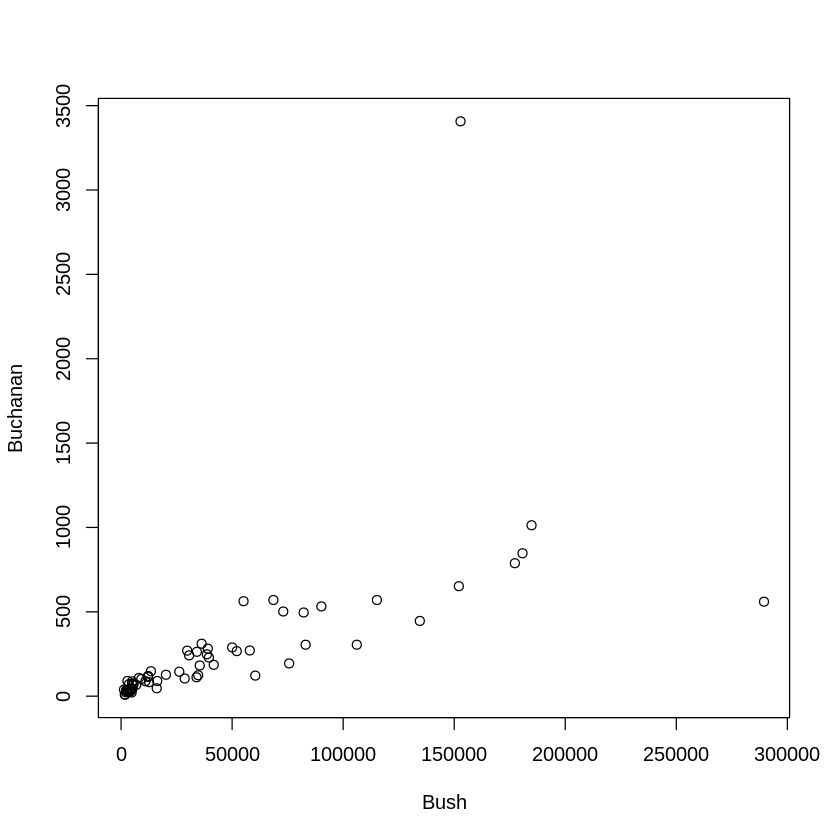

In [192]:
plot(Bush00, Buchanan00, xlab="Bush", ylab="Buchanan")

In [193]:
detach(florida) # In S-PLUS, specify detach("florida")

In [194]:
florida

county,Clinton96,Dole96,Perot96,Bush00,Gore00,Buchanan00
<chr>,<int>,<int>,<int>,<int>,<int>,<int>
Alachua,40144,25303,8072,34124,47365,263
Baker,2273,3684,667,5610,2392,73
Bay,17020,28290,5922,38637,18850,248
Bradford,3356,4038,819,5414,3075,65
Brevard,80416,87980,25249,115185,97318,570
Broward,320736,142834,38964,177323,386561,788
Calhoun,1794,1717,630,2873,2155,90
Charlotte,27121,27836,7783,35426,29645,182
Citrus,22042,20114,7244,29765,25525,270


Here is a function that makes it possible to plot the figures for any pair of candidates.

In [195]:
plot.florida <- function(xvar="Bush00", yvar="Buchanan00"){
x <- florida[,xvar]
y <- florida[,yvar]
plot(x, y, xlab=xvar,ylab=yvar)
mtext(side=3, line=1.75,
 "Votes in Florida, by county, in \nthe 2000 US Presidential election")
}

Note that the function body is enclosed in braces ({ }).
Figure 6 shows the graph produced by plot.florida(), i.e. parameter settings are left at their defaults.

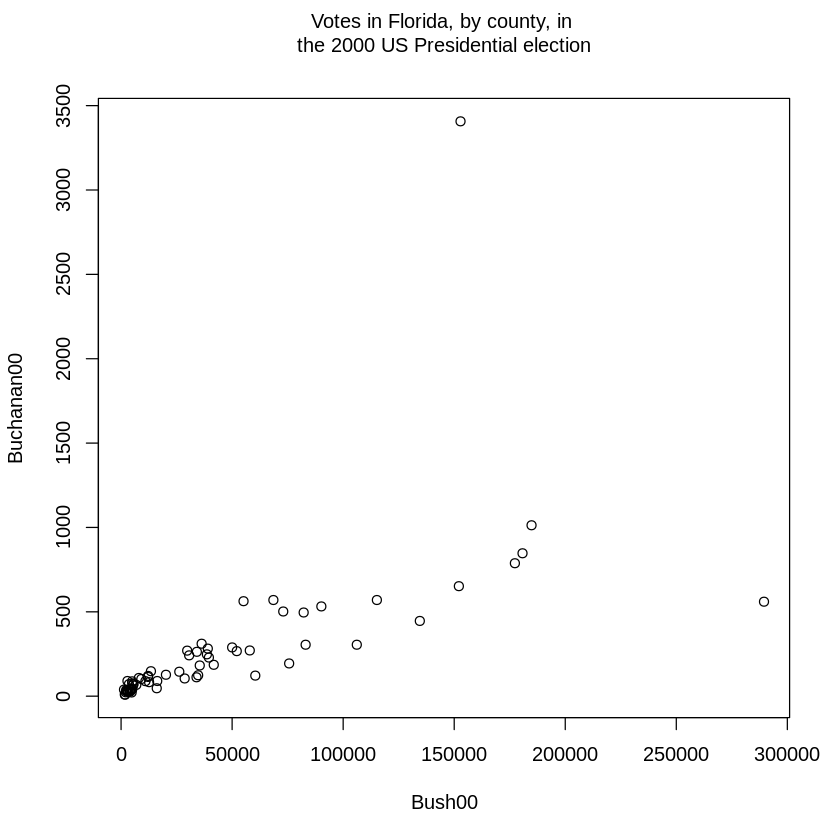

In [196]:
plot.florida()

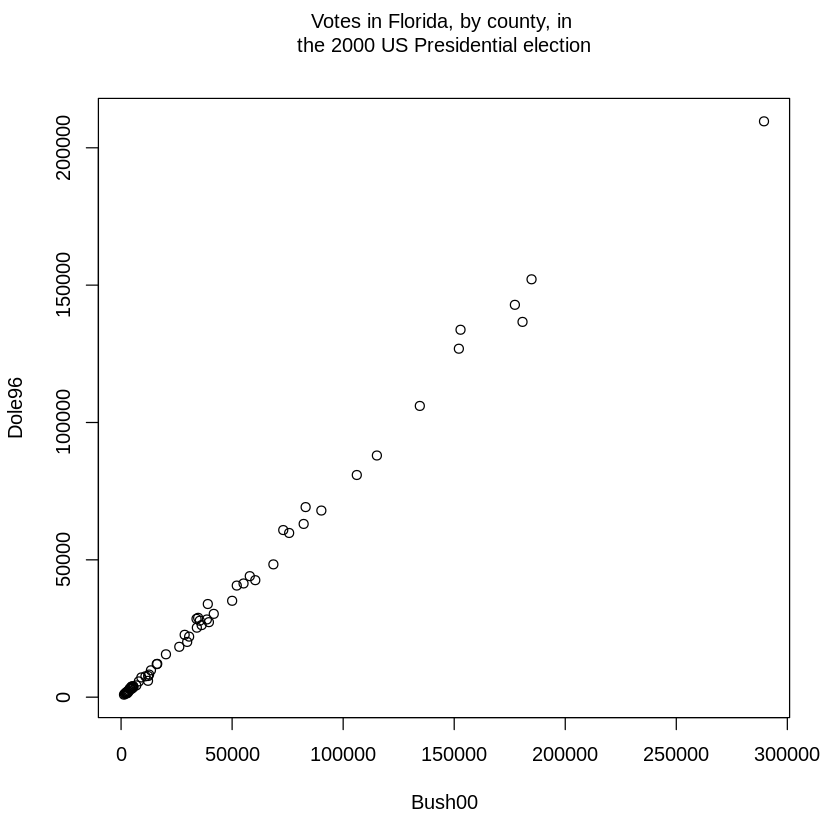

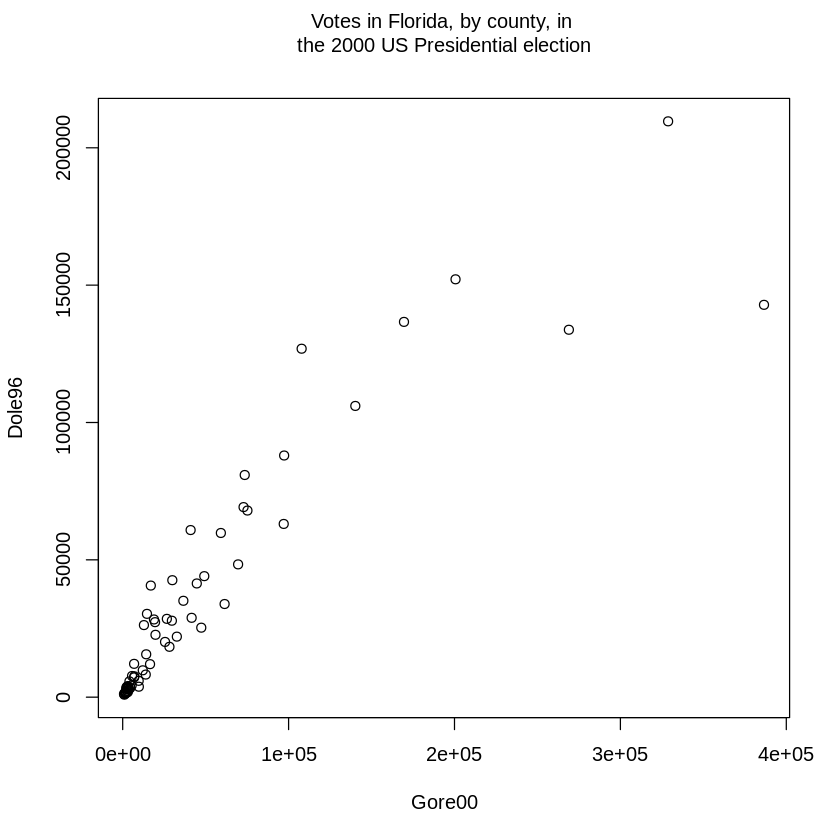

In [197]:
# As well as plot.florida(), the function allows, e.g.
plot.florida(yvar="Dole96") # yvar=”NADER” over-rides the default
plot.florida(xvar="Gore00", yvar="Dole96")

## **2.10 More Detailed Information**

Chapters 7 and 8 have a more detailed coverage of the topics in this chapter. It may pay, at this point, to glance
through chapters 7 and 8. Remember also to use R’s help pages and functions.
Topics from chapter 7, additional to those covered above, that may be important for relatively elementary uses
of R include:
The entry of patterned data (7.1.3)
The handling of missing values in subscripts when vectors are assigned (7.2)
Unexpected consequences (e.g. conversion of columns of numeric data into factors) from errors in data
(7.4.1).

## **2.11 Exercises**

1. For each of the following code sequences, predict the result. Then do the computation:

a) answer <- 0
for (j in 3:5){ answer <- j+answer }

b) answer<- 10
for (j in 3:5){ answer <- j+answer }

c) answer <- 10
for (j in 3:5){ answer <- j*answer }

In [198]:
# (a)
answer <- 0
for (j in 3:5){
  answer <- j + answer
}
print(answer)

[1] 12


In [199]:
# (b)

answer <- 10
for (j in 3:5){
  answer <- j + answer
}
print(answer)


[1] 22


In [200]:
# (c)

answer <- 10
for (j in 3:5){
  answer <- j * answer
}
print(answer)

[1] 600


2. Look up the help for the function prod(), and use prod() to do the calculation in 1(c) above. Alternatively,
how would you expect prod() to work? Try it!

In [201]:
answer <- prod(3:5) * 10
print(answer)

[1] 600


prod() is a function that calculates the product of all elements in a vector. So, we would expect prod(3:5) to calculate the product of 3, 4, and 5, which is 60.

In [202]:
prod(3:5)

[1] 60

As we can see, prod() calculates the product of all elements in the vector, regardless of the starting value. Therefore, to get the desired result of 300 in this case, we need to multiply the product by 10.

In [203]:
answer <- prod(3:5) * 10
print(answer)

[1] 600


3. Add up all the numbers from 1 to 100 in two different ways: using for and using sum. Now apply the
function to the sequence 1:100. What is its action?

In [204]:
# Adding up all the numbers from 1 to 100 using for:
total <- 0
for (i in 1:100) {
  total <- total + i
}
print(total)

[1] 5050


In [205]:
# Adding up all the numbers from 1 to 100 using sum:

total <- sum(1:100)
print(total)


[1] 5050


In [206]:
# Applying the sum() function to the sequence 1:100:

sum(1:100)

[1] 5050

**Action of the sum() function:**

The sum() function calculates the sum of all elements in a vector. In this case, it calculates the sum of all integers from 1 to 100, which is 5050.

4. Multiply all the numbers from 1 to 50 in two different ways: using for and using prod.

In [207]:
# Multiplying all the numbers from 1 to 50 using for:

product <- 1
for (i in 1:50) {
  product <- product * i
}
print(product)

[1] 3.04e+64


In [208]:
# Multiplying all the numbers from 1 to 50 using prod:

product <- prod(1:50)
print(product)

[1] 3.04e+64


Both methods achieve the same result, which is the product of all integers from 1 to 50. The for loop iterates through each element in the sequence and multiplies it with the accumulating product. The prod() function directly calculates the product of all elements in the vector.

5. The volume of a sphere of radius r is given by 4r3
/3. For spheres having radii 3, 4, 5, …, 20 find the
corresponding volumes and print the results out in a table. Use the technique of section 2.1.5 to construct a data
frame with columns radius and volume.

In [209]:

# Create a sequence of radii
radii <- 3:20

# Calculate the volumes using the formula 4r^3/3
volumes <- (4/3) * pi * radii^3

# Create a data frame with columns radius and volume
sphere_volumes <- data.frame(radius = radii, volume = volumes)

# Print the data frame
print(sphere_volumes)

   radius volume
1       3    113
2       4    268
3       5    524
4       6    905
5       7   1437
6       8   2145
7       9   3054
8      10   4189
9      11   5575
10     12   7238
11     13   9203
12     14  11494
13     15  14137
14     16  17157
15     17  20580
16     18  24429
17     19  28731
18     20  33510


6. Use sapply() to apply the function is.factor to each column of the supplied data frame tinting. For
each of the columns that are identified as factors, determine the levels. Which columns are ordered factors?
```
[Use is.ordered()].
```

In [210]:
# Read the dataset
tinting <- read.csv("/content/tinting.csv")

# Convert columns to factors
tinting$sex <- factor(tinting$sex, levels = c("f", "m"))
tinting$tint <- factor(tinting$tint, levels = c("no", "lo", "hi"))
tinting$target <- factor(tinting$target, levels = c("hicon", "locon"))
tinting$agegp <- factor(tinting$agegp, levels = c("younger", "older"))

# Apply is.factor() to each column of the dataset
factor_columns <- sapply(tinting, is.factor)

# Identify columns that are factors
factor_names <- names(factor_columns[factor_columns])

# Determine levels for factor columns
levels_list <- lapply(tinting[factor_names], levels)

# Identify ordered factor columns
ordered_factors <- sapply(tinting[factor_names], is.ordered)

# Print factor columns and their levels
cat("Factor columns and their levels:\n")
for (i in seq_along(factor_names)) {
  cat("Column:", factor_names[i], "\n")
  cat("Levels:", paste(levels_list[[i]], collapse = ", "), "\n")
  if (ordered_factors[i]) {
    cat("Ordered: Yes\n\n")
  } else {
    cat("Ordered: No\n\n")
  }
}


Factor columns and their levels:
Column: sex 
Levels: f, m 
Ordered: No

Column: tint 
Levels: no, lo, hi 
Ordered: No

Column: target 
Levels: hicon, locon 
Ordered: No

Column: agegp 
Levels: younger, older 
Ordered: No

